This project is based on a paper titled "Machine learning in medicine: a practical introduction" published by [Jenni A. M. Sidey-Gibbons](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-019-0681-4#auth-Jenni_A__M_-Sidey_Gibbons-Aff1) & [Chris J. Sidey-Gibbons](https://orcid.org/0000-0002-4732-7305) in the BiomedCentral, a for-profit open access journel. The code showcased are not my own. I simply tried to reproduce the results.

The article showcases the application of machine learning methodologies in constructing three predictive models for cancer diagnosis. These models are built using descriptions of nuclei obtained from breast masses.

The algorithms used are regularized General Linear Model regression(GLMs), Support Vector Machines (SVMs) with a radial basis function kernel and single-layer Artificial Neural Networks.

The dataset used in this project is the publicly available dataset called Breast Cancer Wisconsin Diagnositc Data Set from the University of California Irvine Machine Learning Repository.

It consists of characteristics of cell nuclei taken from breast masses which were samples using fine-needle aspiration(FNA)

The project used R Statistical Programming Language.

**Step 1** :  Importing the dataset

In [1]:
cancer = read.csv(paste0("https://archive.ics.uci.edu/ml/machine-learning-databases/","breast-cancer-wisconsin/breast-cancer-wisconsin.data"), header = FALSE)

names(cancer) = c("ID", "thickness", "cell_size", "cell_shape", "adhesion", "epithelial_size", "bare_nuclei", "bland_cromatin", "normal_nucleoli", "mitosis", "class")

**Step 2** : Modifying the data by re-scoring missing data from '?' to NA

In [2]:
cancer = as.data.frame(cancer)
cancer$bare_nuclei = replace(cancer$bare_nuclei,cancer$bare_nuclei=='?',NA)
cancer = na.omit(cancer)
cancer$class = (cancer$class/2)-1

**Step 3** : Splitting the dataset into two required segments, one which contains 67% of the dataset will be used for training and the other, which contains the remaining 33%, used for evaluation.

In [3]:
set.seed(080817)
index = 1:nrow(cancer)
testindex = sample(index, trunc(length(index)/3))
testset = cancer[testindex,]
trainset = cancer[-testindex,]

x_train = data.matrix(trainset[,2:10])
y_train = as.numeric(trainset[,11])

x_test = data.matrix(testset[,2:10])
y_test = as.numeric(testset[,11])

**Step 4** : training the ML algorithms using

**(1)**  Logistic regression using Generalised Linear Models (GLMs) with Least Absolute Selection and Shrinkage Operator (LASSO) regularisation.

**(2)**  Support Vector Machines (SVMs) with a radial basis function (RBF) kernel.

**(3)**  Artificial Neural Networks (ANNs) with a single hidden layer.

**->** Regularised GLMs are operationalised in R using the glmnet package

In [4]:
install.packages("glmnet")
require(glmnet)
glm_model = cv.glmnet(x_train, y_train, alpha=1, nfolds=10)
lambda.min = glm_model$lambda.min
glm_coef = round(coef(glm_model, s= lambda.min),2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-8



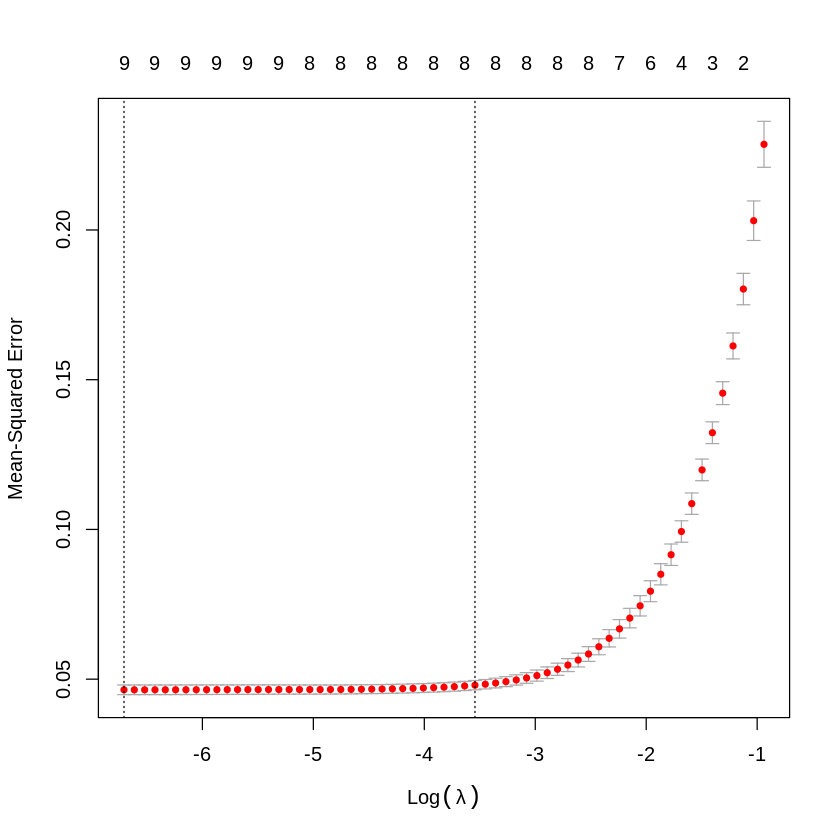

In [5]:
plot(glm_model)

Cross-validation curves which involves resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations




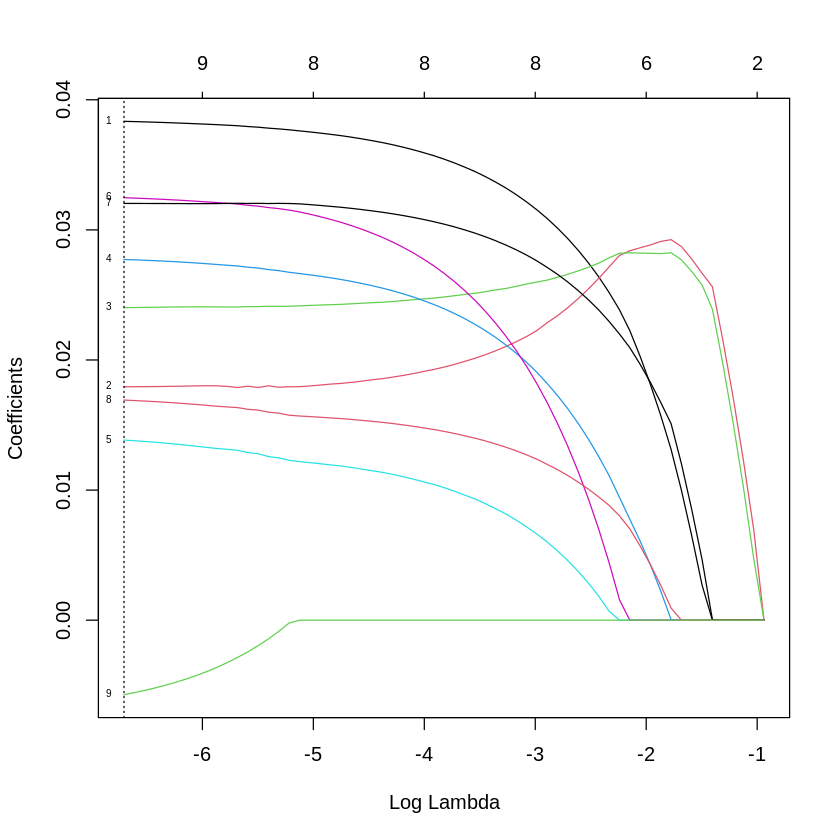

In [6]:
plot(glmnet(x_train,y_train, family="gaussian", alpha=1),"lambda", label=T, main="")
abline(v=log(lambda.min), lty=3)

In [7]:
install.packages("e1071")
require(e1071)
svm_model = svm(x_train, y_train, cost = 1, gamma = c(1/(ncol(x_train)-1)), kernel="radial", cross=10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Loading required package: e1071

Warning message in cret$cresults * scale.factor:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”


In [8]:
install.packages("nnet")
require(nnet)
nnet_model = nnet(x_train, y_train, size=5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: nnet



# weights:  56
initial  value 105.981558 
iter  10 value 46.330787
iter  20 value 42.227519
iter  30 value 27.731979
iter  40 value 17.063959
iter  50 value 16.145558
iter  60 value 13.153460
iter  70 value 12.369775
iter  80 value 11.034840
iter  90 value 11.007250
iter 100 value 11.004719
final  value 11.004719 
stopped after 100 iterations


In [9]:
glm_pred = round(predict(glm_model, x_test, type="response"),0)
svm_pred = round(predict(svm_model, x_test, type="response"),0)
nnet_pred = round(predict(nnet_model, x_test, type="raw"),0)

In [10]:
install.packages("caret")
require(caret)
confusionMatrix(as.factor(glm_pred),as.factor(y_test))
confusionMatrix(as.factor(svm_pred),as.factor(y_test))
confusionMatrix(as.factor(nnet_pred),as.factor(y_test))
confusionMatrix(as.factor(predictions$ensemble_votes),as.factor(y_test))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 145   6
         1   4  72
                                          
               Accuracy : 0.9559          
                 95% CI : (0.9205, 0.9787)
    No Information Rate : 0.6564          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9017          
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.9732          
            Specificity : 0.9231          
         Pos Pred Value : 0.9603          
         Neg Pred Value : 0.9474          
             Prevalence : 0.6564          
         Detection Rate : 0.6388          
   Detection Prevalence : 0.6652          
      Balanced Accuracy : 0.9481          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 143   2
         1   6  76
                                          
               Accuracy : 0.9648          
                 95% CI : (0.9317, 0.9847)
    No Information Rate : 0.6564          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9228          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9597          
            Specificity : 0.9744          
         Pos Pred Value : 0.9862          
         Neg Pred Value : 0.9268          
             Prevalence : 0.6564          
         Detection Rate : 0.6300          
   Detection Prevalence : 0.6388          
      Balanced Accuracy : 0.9670          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 144   5
         1   5  73
                                          
               Accuracy : 0.9559          
                 95% CI : (0.9205, 0.9787)
    No Information Rate : 0.6564          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9023          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9664          
            Specificity : 0.9359          
         Pos Pred Value : 0.9664          
         Neg Pred Value : 0.9359          
             Prevalence : 0.6564          
         Detection Rate : 0.6344          
   Detection Prevalence : 0.6564          
      Balanced Accuracy : 0.9512          
                                          
       'Positive' Class : 0               
                              

ERROR: Error in eval(expr, envir, enclos): object 'predictions' not found


Sensitivity, specificity and accuracy are used to evaluate the performance of the three algorithms.

**Sensitivity** = true positives/actual positives

**Specificity** = true negative/actual negatives

**Accuracy** = (trye positves + true negatives)/total predictions

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



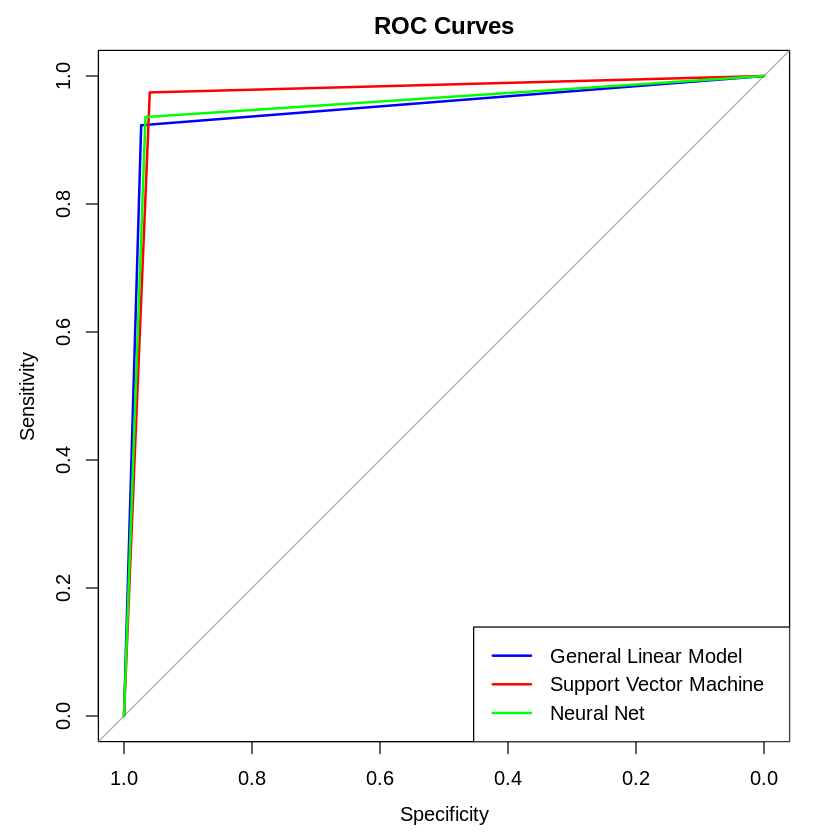

In [11]:
install.packages("pROC")
library(pROC)

# Assuming you have glm_pred, svm_pred, and nnet_pred as predicted probabilities and y_test as the true labels

# Calculate ROC curves for each model
roc_glm <- roc(as.vector(y_test), as.vector(glm_pred))
roc_svm <- roc(as.vector(y_test), as.vector(svm_pred))
roc_nnet <- roc(as.vector(y_test), as.vector(nnet_pred))

# Plot ROC curves on a single graph
plot(roc_glm, col = "blue", main = "ROC Curves")
plot(roc_svm, col = "red", add = TRUE)
plot(roc_nnet, col = "green", add = TRUE)

# Add legend
legend("bottomright",
       legend = c("General Linear Model", "Support Vector Machine", "Neural Net"),
       col = c("blue", "red", "green"), lwd = 2)


In [12]:
thickness = 8
cell_size = 7
cell_shape = 8
adhesion = 5
epithelial_size = 5
bare_nuclei = 7
bland_cromatin = 9
normal_nucleoli = 8
mitoses = 10

new_data = c(thickness,cell_size,cell_shape,adhesion,epithelial_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitoses)

new_pred_glm = predict(glm_model, data.matrix(t(new_data))
                          ,type="response")
new_pred_svm = predict(svm_model, data.matrix(t(new_data))
                          ,type="response")
new_pred_nnet = predict(nnet_model , data.matrix(t(new_data)),type="raw")

print(new_pred_glm)
print(new_pred_svm)
print(new_pred_nnet)

     lambda.1se
[1,]   1.094808
        1 
0.9551878 
          [,1]
[1,] 0.9999983


### **Additional ML techniques**

In [13]:
predictions = data.frame(glm_pred,svm_pred,nnet_pred)
names(predictions) = c("glm","svm","nnet")
predictions$sum = rowSums(predictions)

algorithms_n = 3
predictions$ensemble_votes = round(predictions$sum/algorithms_n)
print(predictions$ensemble_votes[1:30])

 [1] 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1


The paper concludes proving that maximum accuracy(0.96) and area under curve (0.97) was achieved using SVM algorithm. The three algorithms were able to classify cell nuclei in the remainder of the dataset with high accuracy.

The paper demonstates how ML concepts can be used with high accuracy, sensitivty and specificity  by medical researchers and clinicians in medical research.